In [1]:
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta
import os
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
from scipy import signal as sig
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
from time import time
import copy 
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
%matplotlib inline


def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = pwd + '\\pictures'
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png', dpi=150, bbox_inches='tight')
    os.chdir(pwd)

plt.rcParams['figure.figsize'] = 9, 4.5


import New_lib as oa
from importlib import reload

In [28]:
train=tetr[:-5000]
test=tetr[-5000:]

In [29]:
test1=test.copy()
train1=train.copy()
tetr1=tetr.copy()

In [30]:
test=oa.diff_integ([1]).fit_transform(test)
train= oa.diff_integ([1]).fit_transform(train)
tetr = oa.diff_integ([1]).fit_transform(tetr)

In [31]:
from statsmodels.tsa.ar_model import AR
auto=AR(train).fit(maxlag=16)
# fir_params = np.roll(auto.params, -1)
fir_params=auto.params[::-1]
for i in fir_params:
    print(i)
init_w=np.array([0.54895636, 0.53945812, 0.39326348, 0.69258814, 0.53322029,
       0.78677416, 0.46654675, 0.92957462, 0.36938131, 0.11492359,
       0.62794282, 0.57659524, 0.76807041, 0.16261142, 0.60229999,
       0.40991791, 0.04707655])-0.5

array([ 0.04895636,  0.03945812, -0.10673652,  0.19258814,  0.03322029,
        0.28677416, -0.03345325,  0.42957462, -0.13061869, -0.38507641,
        0.12794282,  0.07659524,  0.26807041, -0.33738858,  0.10229999,
       -0.09008209, -0.45292345])

In [ ]:
los2=oa.loss_onl(order=16,soft_grad=False,lrate=0.025,init_w=init_w,loss_f='sqrt((y_pred-y_true)**2)')
los2.fit(train)

In [ ]:
los3=oa.loss_onl(order=16,soft_grad=False,lrate=0.025,init_w=init_w,loss_f='log(cosh(y_pred-y_true))')
los3.fit(train)

In [ ]:
los4=oa.qqq(order=16,soft_grad=False,lrate=0.025,init_w=init_w,delta=1,loss_f='hub')
los4.fit(train)

In [ ]:
los5=oa.qqq(order=16,soft_grad=False,lrate=0.025,init_w=init_w,loss_f='hub',delta=0.1)
los5.fit(train)

In [ ]:
los6=oa.qqq(order=16,soft_grad=False,lrate=0.025,init_w=init_w,loss_f='hub',delta=10)
los6.fit(train)

In [31]:
pred1=los1.pred.copy()
ww1=los1.ww.copy()

In [32]:
pred2=los2.pred.copy()
ww2=los2.ww.copy()

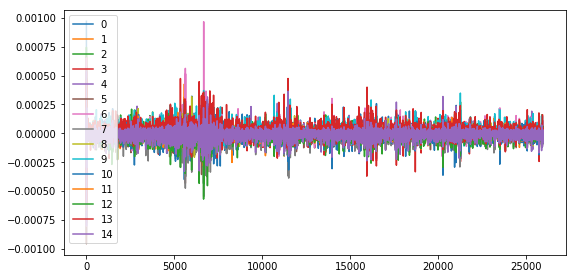

In [112]:
ww1.diff(1).iloc[:,:15].plot()

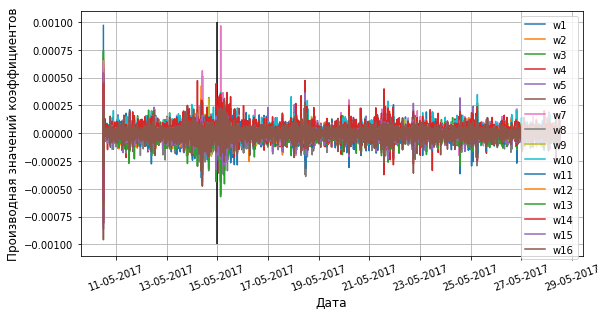

In [178]:
plt.figure()
for i in range(ww1.shape[1]-1):
    plt.plot(tetr.index[:len(ww1)],ww1.diff(1).iloc[:,i],label='w' + str(i+1))
# plt.title('weight №' + str(w+1))
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=20)
plt.ylabel('Производная значений коэффициентов',fontsize=12)
plt.xlabel('Дата',fontsize=12)
plt.grid()
plt.vlines('15-05-2017',-0.001,0.001,label='accident')
save('diff')
plt.show()

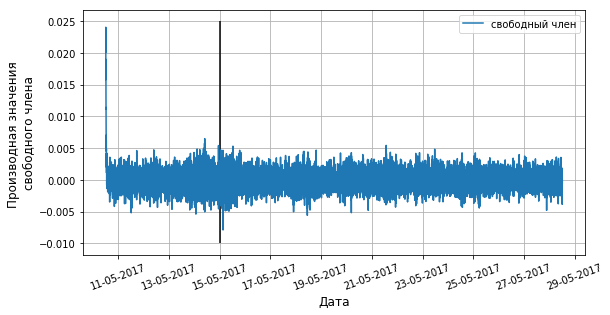

In [177]:
plt.figure()
i=15
plt.plot(tetr.index[:len(ww1)],ww1.diff(1).iloc[:,16],label='свободный член')
# plt.title('weight №' + str(w+1))
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=20)
plt.ylabel('Производная значения \nсвободного члена',fontsize=12)
plt.xlabel('Дата',fontsize=12)
plt.grid()
plt.vlines('15-05-2017',-0.01,0.025,label='accident')
save('16')
plt.show()